In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [108]:
import pandas as pd

In [109]:
metadata = pd.read_csv("/content/drive/My Drive/metadata.csv")

In [110]:
metadata.head()

,author_id,pratilipi_id,category_name,reading_time,updated_at,published_at
0,-3418949279741297,1025741862639304,translation,0,2020-08-19 15:26:13,2016-09-30 10:37:04
1,-2270332351871840,1377786215601277,translation,171,2021-01-21 16:27:07,2018-06-11 13:17:48
2,-2270332352037261,1377786215601962,translation,92,2020-09-29 12:33:57,2018-06-12 04:19:12
3,-2270332352521845,1377786215640994,translation,0,2019-10-17 09:03:37,2019-09-26 14:58:53
4,-2270332349665658,1377786215931338,translation,47,2020-05-05 11:33:41,2018-11-25 12:28:23


In [111]:

userdata = pd.read_csv("/content/drive/My Drive/user-interactions.csv")

In [112]:
userdata.head()

,Unnamed: 0,user_id,pratilipi_id,read_percent,updated_at
0,0,5506791963854965,1377786220672965,100.0,2022-03-23 00:08:26.227
1,1,5506791979071996,1377786219742624,29.0,2022-03-23 00:08:26.220
2,2,5506791980256358,1377786217096334,22.0,2022-03-23 00:08:26.020
3,3,5506791988747277,1377786224767880,100.0,2022-03-23 00:08:25.306
4,4,5506791992372558,1377786218111595,100.0,2022-03-23 00:08:25.250


In [113]:
print("metadata shape:",metadata.shape)
print("userdata shape:",userdata.shape)

metadata shape: (954501, 6)
userdata shape: (10000000, 5)


In [114]:
metadata.columns.values


array(['author_id', 'pratilipi_id', 'category_name', 'reading_time',
       'updated_at', 'published_at'], dtype=object)

In [115]:
userdata.columns.values

array(['Unnamed: 0', 'user_id', 'pratilipi_id', 'read_percent',
       'updated_at'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f649a7ea1d0>,
      dtype=object)

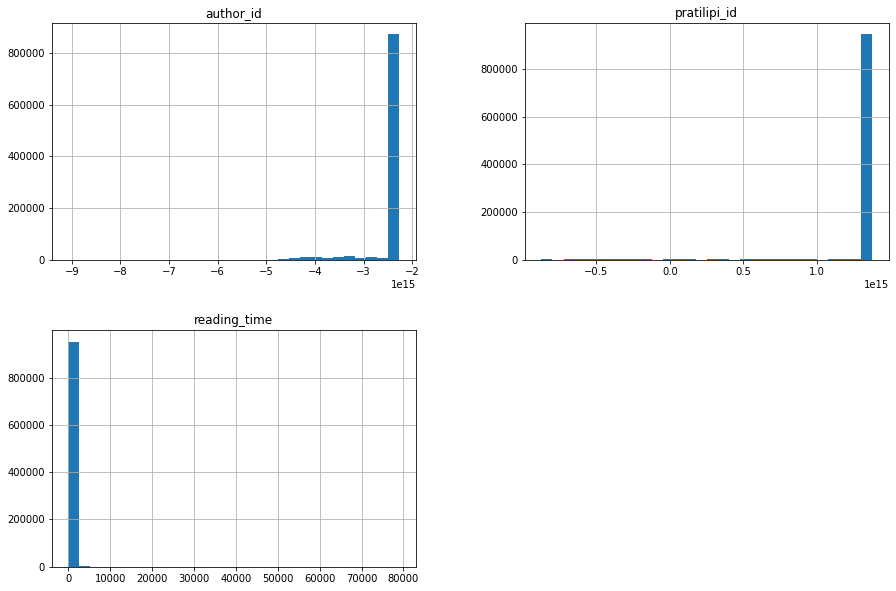

In [116]:
metadata.hist(bins=30, figsize=(15, 10))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f649a650e10>,
      dtype=object)

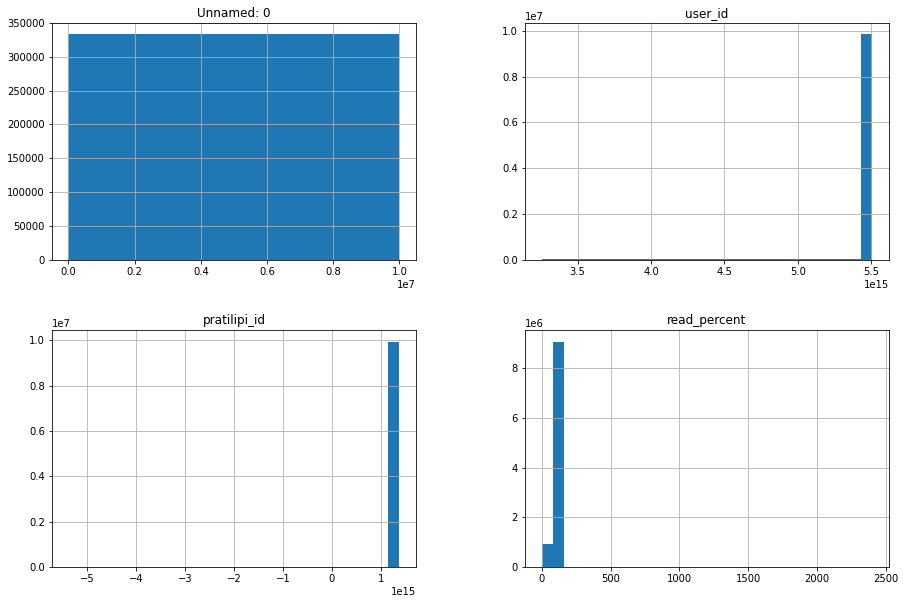

In [117]:
userdata.hist(bins=30, figsize=(15, 10))


In [118]:
metadata["category_name"].value_counts()

romance                      193220
shortstories                 102097
social                        73920
suspense                      64041
family                        58515
novels                        53584
life                          51356
moral-inspiring               47421
women                         37168
horror                        28506
entertainment                 23362
action-and-adventure          21589
experiences-and-memories      20276
webseries                     16227
relegion-and-spiritual        15476
comedy                        14893
Pratilipi-kalamkar-samman     13237
mythology                     12324
children                      10196
Indiawale                      9674
Pratilipi-Awards-Hindi         9342
fantasy                        9324
swahindi2                      7853
drama                          7387
crime                          7151
politics                       5810
translation                    4250
short-story-challenge       

In [119]:
len(metadata["category_name"].value_counts())

45

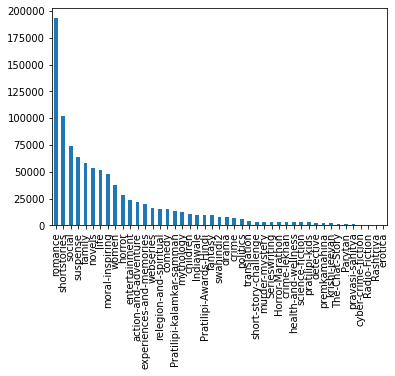

In [120]:
metadata['category_name'].value_counts().plot(kind='bar')


In [121]:
import matplotlib.pyplot as plt

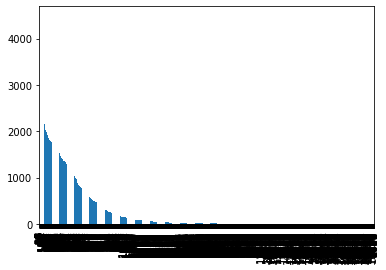

In [122]:
metadata['reading_time'].value_counts().plot(kind='bar')

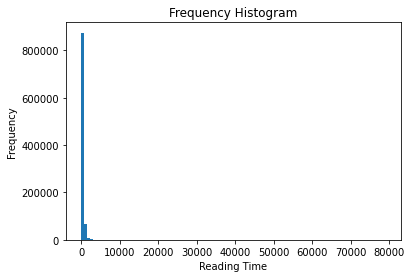

In [123]:
plt.hist(metadata['reading_time'], bins=100)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency',xlabel="Reading Time");


In [124]:
len(metadata[metadata["reading_time"]==0])


4055

In [125]:
metadata['reading_time'].max()

78983

In [126]:
len(metadata[metadata["reading_time"]>1000])


42891

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Reading Time'),
 Text(0.5, 1.0, 'Frequency Histogram')]

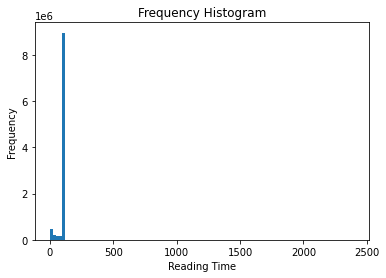

In [127]:
plt.hist(userdata["read_percent"], bins=100)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency',xlabel="Reading Time")

In [128]:
userdata['read_percent'].max()

2400.0

In [129]:
#Keeping the max read percent to 100
userdata['read_percent'] = userdata['read_percent'].apply(lambda x: x if x<=100 else 100)

In [130]:
userdata['read_percent'].max()

100.0

In [131]:
userdata['read_percent'].min()

0.0

In [46]:
len(userdata[userdata["read_percent"]==0])

37773

In [132]:
userdata.head()

,Unnamed: 0,user_id,pratilipi_id,read_percent,updated_at
0,0,5506791963854965,1377786220672965,100.0,2022-03-23 00:08:26.227
1,1,5506791979071996,1377786219742624,29.0,2022-03-23 00:08:26.220
2,2,5506791980256358,1377786217096334,22.0,2022-03-23 00:08:26.020
3,3,5506791988747277,1377786224767880,100.0,2022-03-23 00:08:25.306
4,4,5506791992372558,1377786218111595,100.0,2022-03-23 00:08:25.250


In [133]:
userdata.drop("Unnamed: 0", axis=1, inplace=True)


In [53]:
userdata.head()

,user_id,pratilipi_id,read_percent,updated_at
0,5506791963854965,1377786220672965,100.0,2022-03-23 00:08:26.227
1,5506791979071996,1377786219742624,29.0,2022-03-23 00:08:26.220
2,5506791980256358,1377786217096334,22.0,2022-03-23 00:08:26.020
3,5506791988747277,1377786224767880,100.0,2022-03-23 00:08:25.306
4,5506791992372558,1377786218111595,100.0,2022-03-23 00:08:25.250


In [134]:
count = userdata.groupby('user_id').count()


In [135]:
count.head()

,pratilipi_id,read_percent,updated_at
user_id,,,
3255387601412772,2,2,2
3256456725308068,1,1,1
3257398541066916,8,8,8
3257552805995172,30,30,30
3257621147984548,5,5,5


In [136]:
#Dropping user ids with less than 10 interactions
userdata = userdata.loc[userdata['user_id'].isin(countdf[countdf['pratilipi_id'] > 15].index)].reset_index(drop = True)


In [137]:
userdata.shape

(9007840, 4)

In [138]:
userdata = userdata[userdata["pratilipi_id"].isin(metadata["pratilipi_id"].unique())].reset_index(drop = True)

In [139]:
userdata.shape

(5340537, 4)

In [140]:
userdata.head()

,user_id,pratilipi_id,read_percent,updated_at
0,5506791963854965,1377786220672965,100.0,2022-03-23 00:08:26.227
1,5506791992372558,1377786218111595,100.0,2022-03-23 00:08:25.250
2,5506791958041994,1377786225711380,100.0,2022-03-23 00:08:21.954
3,5506791978198543,1377786220930983,100.0,2022-03-23 00:08:20.095
4,5506791975873682,1377786225752249,100.0,2022-03-23 00:08:19.906


In [141]:
metadata.head()

,author_id,pratilipi_id,category_name,reading_time,updated_at,published_at
0,-3418949279741297,1025741862639304,translation,0,2020-08-19 15:26:13,2016-09-30 10:37:04
1,-2270332351871840,1377786215601277,translation,171,2021-01-21 16:27:07,2018-06-11 13:17:48
2,-2270332352037261,1377786215601962,translation,92,2020-09-29 12:33:57,2018-06-12 04:19:12
3,-2270332352521845,1377786215640994,translation,0,2019-10-17 09:03:37,2019-09-26 14:58:53
4,-2270332349665658,1377786215931338,translation,47,2020-05-05 11:33:41,2018-11-25 12:28:23


In [142]:
#taking absolute values to remove the negative sign
metadata["pratilipi_id"] = metadata.apply(lambda x : abs(x["pratilipi_id"]),axis = 1)
metadata["author_id"] = metadata.apply(lambda x : abs(x["author_id"]),axis = 1)


In [143]:
metadata.head()

,author_id,pratilipi_id,category_name,reading_time,updated_at,published_at
0,3418949279741297,1025741862639304,translation,0,2020-08-19 15:26:13,2016-09-30 10:37:04
1,2270332351871840,1377786215601277,translation,171,2021-01-21 16:27:07,2018-06-11 13:17:48
2,2270332352037261,1377786215601962,translation,92,2020-09-29 12:33:57,2018-06-12 04:19:12
3,2270332352521845,1377786215640994,translation,0,2019-10-17 09:03:37,2019-09-26 14:58:53
4,2270332349665658,1377786215931338,translation,47,2020-05-05 11:33:41,2018-11-25 12:28:23


In [144]:
len(metadata.drop_duplicates(subset = ["pratilipi_id"]))

486693

In [145]:
l = {'category_name':lambda x: list(x), 'updated_at':'max', 'published_at':'min' , 'reading_time':'mean'}

metadata = metadata.groupby(['author_id', 'pratilipi_id']).agg(l).reset_index()


In [94]:
metadata.head()

,author_id,pratilipi_id,category_name,updated_at,published_at,reading_time
0,2270332315564861,1377786228382147,[suspense],2022-03-23 17:08:39,2022-03-23 17:04:12,167.0
1,2270332315571003,1377786228376050,[romance],2022-03-23 10:35:32,2022-03-23 10:35:32,103.0
2,2270332315572752,1377786228375550,[romance],2022-03-23 09:27:14,2022-03-23 09:27:14,33.0
3,2270332315577379,1377786228374246,[romance],2022-03-23 07:49:14,2022-03-23 07:49:14,29.0
4,2270332315584760,1377786228372119,[romance],2022-03-23 05:14:17,2022-03-23 05:14:17,150.0


In [146]:
metadata.tail()

,author_id,pratilipi_id,category_name,updated_at,published_at,reading_time
486688,4566636240762225,1377786218889274,"[novels, romance, suspense]",2020-05-05 18:02:26,2020-05-05 18:02:26,112.0
486689,4566636240762225,1377786224904125,"[detective, romance, murder-mystery]",2021-07-28 15:23:45,2021-07-28 14:14:45,262.0
486690,4566636240762225,1377786227340794,"[romance, fantasy, horror]",2022-01-17 18:09:16,2022-01-17 18:09:16,61.0
486691,9070332352853358,96530313603384,[horror],2018-08-17 10:28:18,2017-12-04 19:11:01,0.0
486692,9070332352853360,312572401325768,"[novels, politics, social]",2018-12-03 01:57:32,2017-12-04 18:08:16,0.0


In [147]:
metadata["published_at"] = pd.to_datetime(metadata["published_at"],utc=True)


In [148]:
metadata["month"] = metadata["published_at"].dt.month
metadata["year"] = metadata["published_at"].dt.year


In [149]:
metadata.head()

,author_id,pratilipi_id,category_name,updated_at,published_at,reading_time,month,year
0,2270332315564861,1377786228382147,[suspense],2022-03-23 17:08:39,2022-03-23 17:04:12+00:00,167.0,3.0,2022.0
1,2270332315571003,1377786228376050,[romance],2022-03-23 10:35:32,2022-03-23 10:35:32+00:00,103.0,3.0,2022.0
2,2270332315572752,1377786228375550,[romance],2022-03-23 09:27:14,2022-03-23 09:27:14+00:00,33.0,3.0,2022.0
3,2270332315577379,1377786228374246,[romance],2022-03-23 07:49:14,2022-03-23 07:49:14+00:00,29.0,3.0,2022.0
4,2270332315584760,1377786228372119,[romance],2022-03-23 05:14:17,2022-03-23 05:14:17+00:00,150.0,3.0,2022.0


In [150]:
metadata.drop(["updated_at","published_at","author_id"],axis = 1,inplace = True)


In [151]:
metadata.head()

,pratilipi_id,category_name,reading_time,month,year
0,1377786228382147,[suspense],167.0,3.0,2022.0
1,1377786228376050,[romance],103.0,3.0,2022.0
2,1377786228375550,[romance],33.0,3.0,2022.0
3,1377786228374246,[romance],29.0,3.0,2022.0
4,1377786228372119,[romance],150.0,3.0,2022.0


In [152]:
data = userdata.merge(metadata, on = 'pratilipi_id',how = 'left')

In [153]:
data.head()

,user_id,pratilipi_id,read_percent,updated_at,category_name,reading_time,month,year
0,5506791963854965,1377786220672965,100.0,2022-03-23 00:08:26.227,"[novels, romance, moral-inspiring]",330.0,8.0,2020.0
1,5506791992372558,1377786218111595,100.0,2022-03-23 00:08:25.250,"[novels, romance, suspense]",1772.0,2.0,2020.0
2,5506791958041994,1377786225711380,100.0,2022-03-23 00:08:21.954,"[family, romance]",216.0,9.0,2021.0
3,5506791978198543,1377786220930983,100.0,2022-03-23 00:08:20.095,"[romance, suspense]",718.0,9.0,2020.0
4,5506791975873682,1377786225752249,100.0,2022-03-23 00:08:19.906,"[novels, Pratilipi-Awards-Hindi, romance]",457.0,9.0,2021.0


In [154]:
data['reading_time'] = data['reading_time'].apply(lambda x: int(x/60))
data.head()

ValueError: ignored

In [157]:
data['reading_time'].isnull().value_counts()


False    5330585
True        9952
Name: reading_time, dtype: int64

In [158]:
data['reading_time'] = data['reading_time'].fillna(0)

In [159]:
data['reading_time'] = data['reading_time'].apply(lambda x: int(x/60))
data.head()

,user_id,pratilipi_id,read_percent,updated_at,category_name,reading_time,month,year
0,5506791963854965,1377786220672965,100.0,2022-03-23 00:08:26.227,"[novels, romance, moral-inspiring]",5,8.0,2020.0
1,5506791992372558,1377786218111595,100.0,2022-03-23 00:08:25.250,"[novels, romance, suspense]",29,2.0,2020.0
2,5506791958041994,1377786225711380,100.0,2022-03-23 00:08:21.954,"[family, romance]",3,9.0,2021.0
3,5506791978198543,1377786220930983,100.0,2022-03-23 00:08:20.095,"[romance, suspense]",11,9.0,2020.0
4,5506791975873682,1377786225752249,100.0,2022-03-23 00:08:19.906,"[novels, Pratilipi-Awards-Hindi, romance]",7,9.0,2021.0


In [160]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [165]:
tfidf = TfidfVectorizer()
#data['category_name_vec'] =  tfidf.fit_transform(data['category_name'])


In [183]:
data['category_name'] = data['category_name'].tolist()

In [188]:
df = data['category_name']

In [189]:
df.reverse()

AttributeError: ignored

In [190]:
df.apply(lambda x:','.join(x))


TypeError: ignored

In [180]:
data = tfidf.fit_transform(data)

AttributeError: ignored

In [191]:
df =  tfidf.fit_transform(df.apply(lambda x: ' '.join(x)))

TypeError: ignored

In [166]:
data['category_name'] = pd.get_dummies(data['category_name'])

TypeError: ignored